# Modules

In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

# Run OOG with seperate ref sequences

In [2]:
data_src = r"E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\first_8000.tif"

Setting source to E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\first_8000.tif
Getting reference sequence
Reference period: 61.82419102610369; Reference indices: [18, 86]
Getting SADs
Getting phases
Setting source to E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\first_8000.tif
Getting SADs
Getting phases


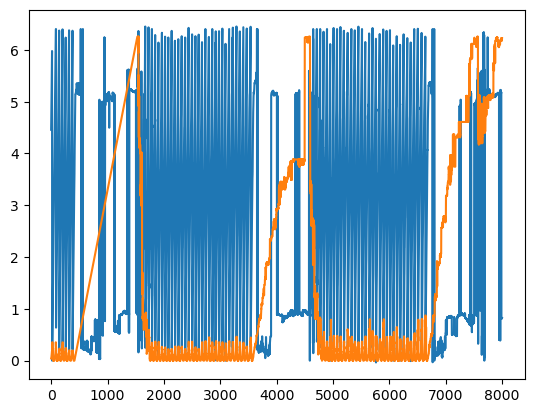

In [3]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.run()

oog_arr = OG.BasicOpticalGating()
oog_arr.sequence_manager.set_source(data_src)
oog_arr.sequence_manager.set_reference_sequence_by_indices([412, 1533])
oog_arr.run()

plt.plot(oog.phases)
plt.plot(oog_arr.phases)

# Find locations where "normal" SAD minima is lower

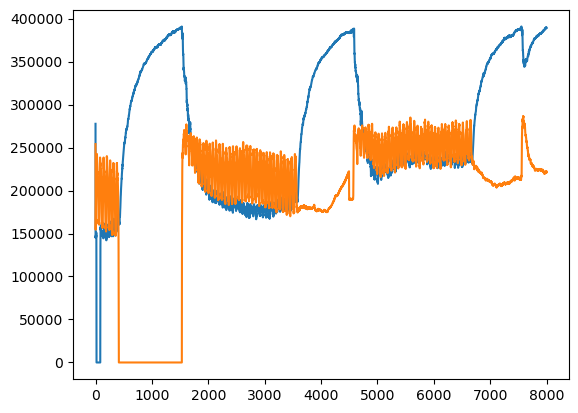

(array([1690, 1691, 1692, 1693, 1726, 1736, 4770, 4771, 4772, 4773, 4775,
       4776, 4780, 4781, 4782, 4784, 4785, 4840, 4962, 5259, 5260, 5261,
       5262, 5637, 5638, 5639, 5640, 5641, 5642, 5653, 5699, 5700, 5887,
       5889, 5895, 5896, 5897, 5898, 5899, 5900, 5901, 5902, 6077, 6078,
       6128, 6129, 6130, 6131, 6132, 6133, 6447, 6501, 6512, 6513, 6568,
       6569, 6570, 6571, 6572, 6573, 6574, 6575, 6576, 6577, 6578, 6579,
       6580, 6581, 6582, 6583, 6634, 6635, 6636, 6637, 6638, 6639, 6640,
       6641, 6642, 6643, 6644, 6645, 6646, 6648, 6650, 6651], dtype=int64),)


In [49]:
oog_sad_mins = np.min(oog.sads,axis = 1)
oog_arr_sad_mins = np.min(oog_arr.sads,axis = 1)

plt.plot(oog_sad_mins)
plt.plot(oog_arr_sad_mins)
plt.show()

good_locs = np.where(oog_sad_mins < oog_arr_sad_mins)
good_locs = np.where((oog_arr.phases > 0.5) & (oog_arr_sad_mins > oog_sad_mins))
print(good_locs)

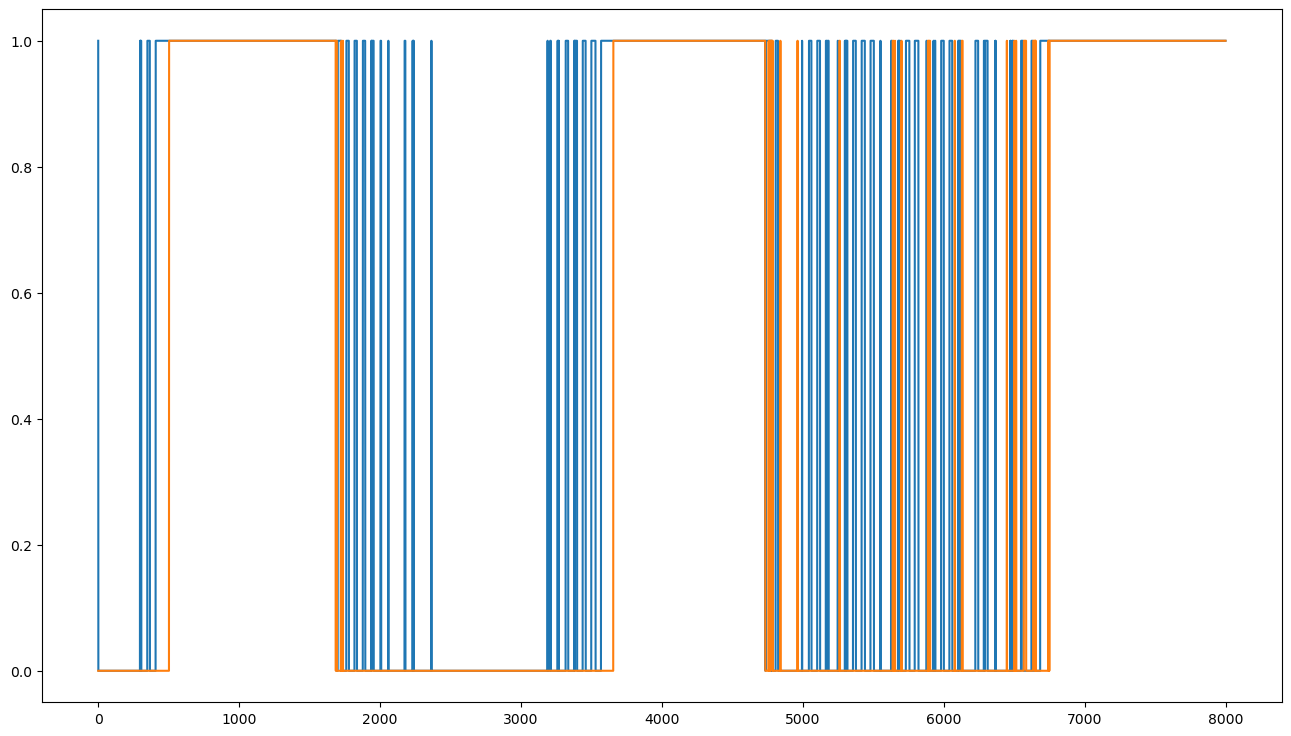

In [50]:
plt.figure(figsize = (16,9))
plt.plot(oog_sad_mins > oog_arr_sad_mins)
#plt.plot(oog.phases / (2 * np.pi))
plt.plot(oog_arr.phases > 0.5)
plt.show()

# Run sort on "normal" SAD locations

In [51]:
sorted_phases = np.argsort(oog.phases[good_locs])
healthy_sequence_sorted = OG.SequenceManager.load_tif(data_src)[good_locs][sorted_phases]

# Save

In [43]:
tf.imwrite(r"E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\sorted_healthy_sequence.tif",healthy_sequence_sorted.astype("uint16"))

In [44]:
diffs = []
for i in range(oog.sequence_manager.reference_sequence.shape[0]):
    diffs.append(jps.sad_with_references(oog.sequence_manager.reference_sequence[i], oog_arr.sequence_manager.reference_sequence[200::]))

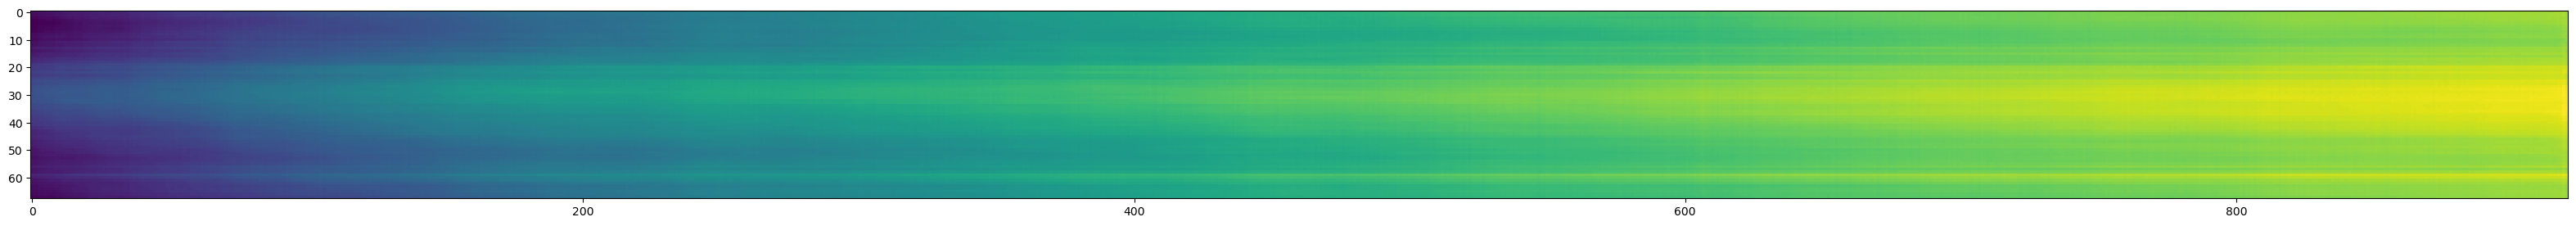

In [45]:
plt.figure(figsize = (40,9))
plt.imshow(diffs, interpolation= "none")
plt.show()